In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import datetime as dt

In [3]:
main = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [50]:
main.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
main.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
main.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

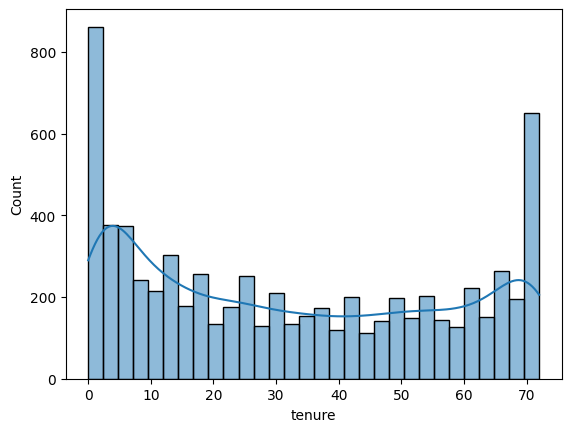

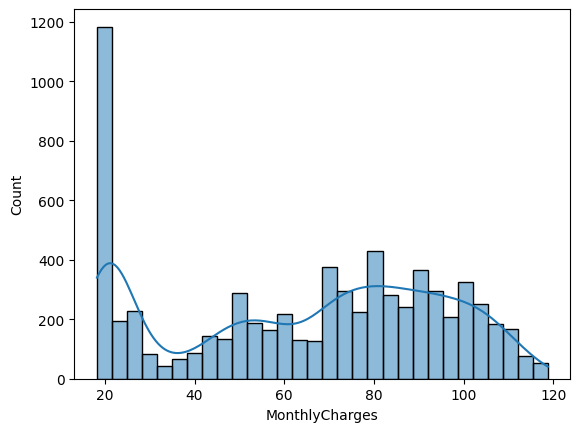

In [53]:
sns.histplot(main['tenure'], kde=True, bins=30)
plt.show()

sns.histplot(main['MonthlyCharges'], kde=True, bins=30)
plt.show()


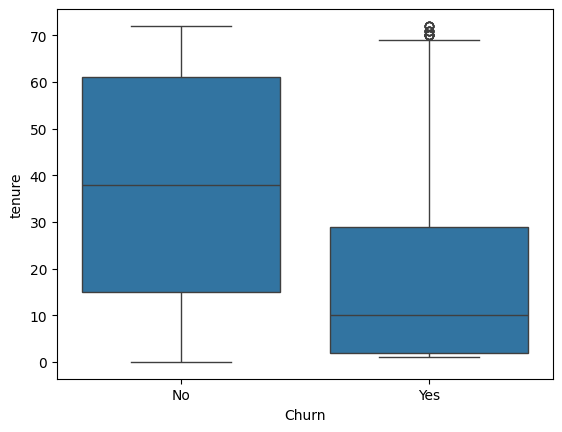

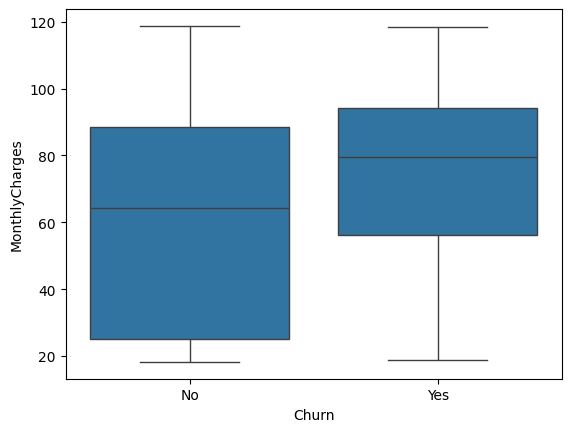

In [54]:
sns.boxplot(x='Churn', y='tenure', data=main)
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=main)
plt.show()


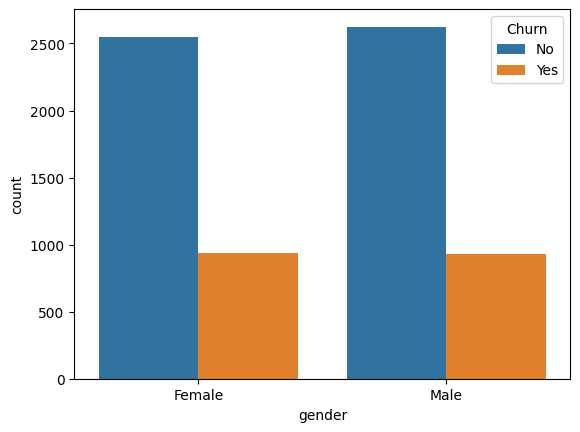

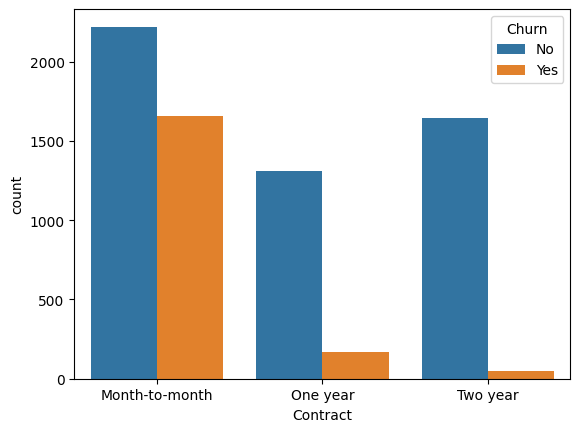

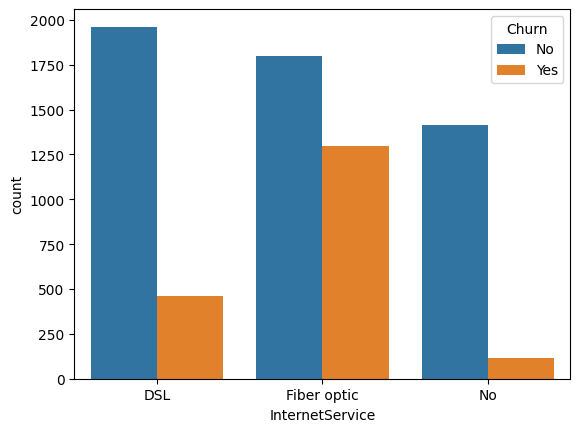

In [55]:
sns.countplot(x='gender', hue='Churn', data=main)
plt.show()

sns.countplot(x='Contract', hue='Churn', data=main)
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=main)
plt.show()


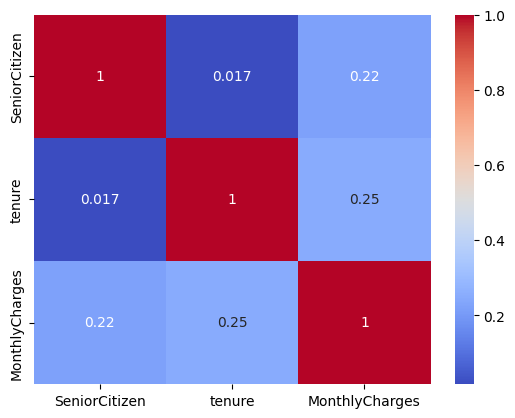

In [56]:
corr = main[['SeniorCitizen','tenure','MonthlyCharges']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [57]:
#BORRAR 
main = main.drop(columns=['customerID'])
#transformar total charges
main['TotalCharges'] = pd.to_numeric(main['TotalCharges'], errors='coerce')
main['TotalCharges'] = main['TotalCharges'].fillna(main['TotalCharges'].median())
main['TotalCharges'] = main['TotalCharges'].astype(float)

In [58]:
main['TotalCharges'].head(10)

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
5     820.50
6    1949.40
7     301.90
8    3046.05
9    3487.95
Name: TotalCharges, dtype: float64

In [59]:
main.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod            MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Mailed check             20.20           20.20         No       3
                                                                                                                                                                                                                                                                                           20.05           20.05         No       3
Female  0              No       N

In [60]:
#Verificar 
for column in main.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(main[column].value_counts())
    print("\n")

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


Column: DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet ser

In [62]:
#Trabformar SeniorCitizen
main['SeniorCitizen'] = main['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
main['Partner'] = main['Partner'].replace({'Yes': 1, 'No': 0})
main['Dependents'] = main['Dependents'].replace({'Yes': 1, 'No': 0})
main['PhoneService'] = main['PhoneService'].replace({'Yes': 1, 'No': 0})
main['gender'] = main['gender'].replace({'Male': 1, 'Female': 0})
main['Churn'] = main['Churn'].replace({'Yes': 1, 'No': 0})
main['PaperlessBilling'] = main['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
#Verificar
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 
